**Bagging**

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

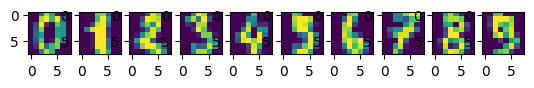

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [3]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [4]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.7088998763906057


In [5]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.8444444444444444
0.8444444444444444
0.8888888888888888
0.8666666666666667
0.8666666666666667
0.8333333333333334
0.8666666666666667
0.8777777777777778
0.8222222222222222
0.9333333333333333
0.8222222222222222
0.8222222222222222
0.8111111111111111
0.8666666666666667
0.8888888888888888
0.8777777777777778
0.8
0.8333333333333334
0.8222222222222222
0.8222222222222222
0.8222222222222222
0.9111111111111111
0.8777777777777778
0.9
0.8111111111111111
0.8555555555555555
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8333333333333334
0.9111111111111111
0.8555555555555555
0.8666666666666667
0.8
0.9
0.9
0.8111111111111111
0.8666666666666667
0.8666666666666667
0.8555555555555555
0.9
0.8888888888888888
0.7555555555555555
0.8222222222222222
0.8444444444444444
0.8444444444444444
0.8
0.8888888888888888
0.8555555555555555
0.8777777777777778
0.8777777777777778
0.8111111111111111
0.8888888888888888
0.8555555555555555
0.8444444444444444
0.8666666666666667
0.8222222222222222
0.9
0.9111111111111111

L'accuracy fluctue beaucoup.

In [6]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [7]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

In [10]:
N = 100

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

0.8444444444444444
0.8444444444444444
0.8888888888888888
0.8666666666666667
0.8666666666666667
0.8333333333333334
0.8666666666666667
0.8777777777777778
0.8222222222222222
0.9333333333333333
0.8222222222222222
0.8222222222222222
0.8111111111111111
0.8666666666666667
0.8888888888888888
0.8777777777777778
0.8
0.8333333333333334
0.8222222222222222
0.8222222222222222
0.8222222222222222
0.9111111111111111
0.8777777777777778
0.9
0.8111111111111111
0.8555555555555555
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8333333333333334
0.9111111111111111
0.8555555555555555
0.8666666666666667
0.8
0.9
0.9
0.8111111111111111
0.8666666666666667
0.8666666666666667
0.8555555555555555
0.9
0.8888888888888888
0.7555555555555555
0.8222222222222222
0.8444444444444444
0.8444444444444444
0.8
0.8888888888888888
0.8555555555555555
0.8777777777777778
0.8777777777777778
0.8111111111111111
0.8888888888888888
0.8555555555555555
0.8444444444444444
0.8666666666666667
0.8222222222222222
0.9
0.9111111111111111

In [11]:
print(np.mean(accuracies), np.std(accuracies))

0.9141111111111112 0.06546802065432453


L'accuracy est bien plus stable avec le bagging.

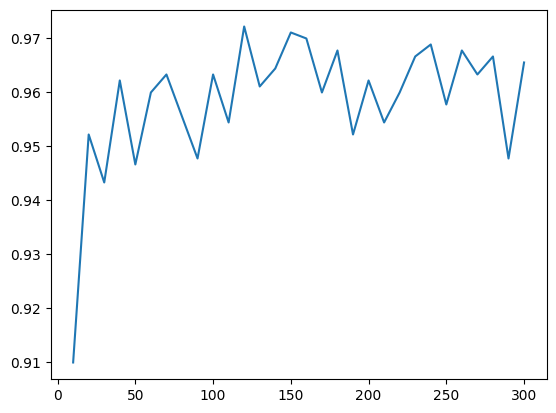

In [12]:
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [13]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9187986651835373
max_samples: 0.8
max_features: 0.4


**Forêts aléatoires**

In [14]:
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [16]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.904202719406675


In [17]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.6644004944375772
Bagging (200 arbres) : 0.8831891223733004
Forêt aléatoire (200 arbres) : 0.9066749072929543


In [18]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9340378197997776 0.010061054570643827
0.9646273637374859 0.005965333783222216


10 0.9410456062291435
20 0.9566184649610678
30 0.9655172413793104
40 0.967741935483871
50 0.967741935483871
60 0.9766407119021134
70 0.9688542825361512
80 0.9733036707452726
90 0.978865406006674
100 0.9744160177975528
110 0.9755283648498332
120 0.9766407119021134
130 0.9744160177975528
140 0.9777530589543938
150 0.9766407119021134
160 0.9766407119021134
170 0.9721913236929922
180 0.9755283648498332
190 0.9744160177975528
200 0.9766407119021134
210 0.9777530589543938
220 0.9766407119021134
230 0.9755283648498332
240 0.978865406006674
250 0.978865406006674
260 0.9755283648498332
270 0.9766407119021134
280 0.9733036707452726
290 0.9744160177975528
300 0.978865406006674


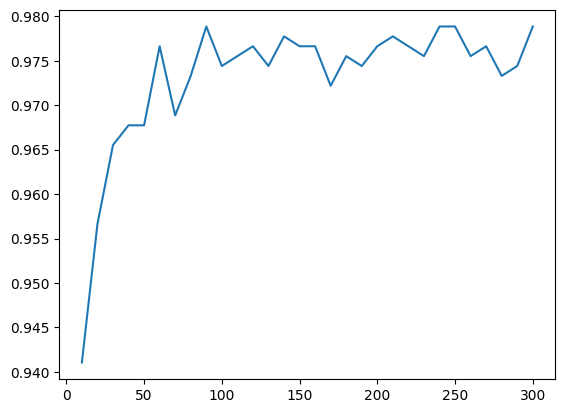

In [19]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.9566184649610678
Extra Trees : 0.9688542825361512


**Boosting**

In [26]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.915327564894932


In [ ]:
# Modification de max_depth :
for i in range(1, 11):   
    clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=i), n_estimators=200, learning_rate=2)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(accuracy)

0.73053152039555
0.8491965389369592
0.8992583436341162
0.8906056860321384
0.9184177997527813
0.9227441285537701
0.915327564894932
0.6118665018541409
0.7095179233621756
0.6823238566131026


In [ ]:
# Modification de learning_rate :
for i in range(1, 11):
    clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=i)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(accuracy)

0.9140914709517923
0.9208899876390606
0.9029666254635352
0.9097651421508035
0.8912237330037083
0.9029666254635352
0.907292954264524
0.9011124845488258
0.9134734239802225
0.9085290482076638


In [ ]:
# Modification de n_estimators :
for i in range(10, 300, 10):
    clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=i, learning_rate=2)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(accuracy)

0.7354758961681088
0.7898640296662547
0.8813349814585909
0.8702101359703337
0.8782447466007417
0.8671199011124846
0.8881334981458591
0.8936959208899876
0.8936959208899876
0.8887515451174289
0.88442521631644
0.8980222496909765
0.9177997527812114
0.9085290482076638
0.9110012360939431
0.9177997527812114
0.9134734239802225
0.9110012360939431
0.9184177997527813
0.9165636588380717
0.9066749072929543
0.9066749072929543
0.9147095179233622
0.9159456118665018
0.9171817058096415
0.915327564894932
0.9165636588380717
0.9134734239802225
0.9035846724351051
